In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

2025-01-18 13:01:22.550056: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 13:01:22.860174: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 13:01:22.861783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-18 13:01:24.335211: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
file_path = 'dataset'

In [3]:
name_class = os.listdir(file_path)
name_class

['Bacterial_Pnemonia', 'Normal', 'Viral _Pneumonia']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['dataset/Bacterial_Pnemonia/Lung_Opacity-518.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-984.png.JPG',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-1103.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-461.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-512.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-1770.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-1415.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-1606.png.JPG',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-786.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-876.png.JPG',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-301.png.JPG',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-303.png.JPG',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-796.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-311.png.JPG',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-1530.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-1551.png.JPG',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-360.png',
 'dataset/Bacterial_Pnemonia/Lung_Opacity-882.png.JPG',
 'dataset/Bacterial_Pnemon

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,dataset/Bacterial_Pnemonia/Lung_Opacity-1314.p...,Bacterial_Pnemonia
1,dataset/Viral _Pneumonia/Viral Pneumonia-1014....,Viral _Pneumonia
2,dataset/Viral _Pneumonia/Viral Pneumonia-292.png,Viral _Pneumonia
3,dataset/Bacterial_Pnemonia/Lung_Opacity-136.pn...,Bacterial_Pnemonia
4,dataset/Normal/Normal-1346.png.JPG.JPG,Normal


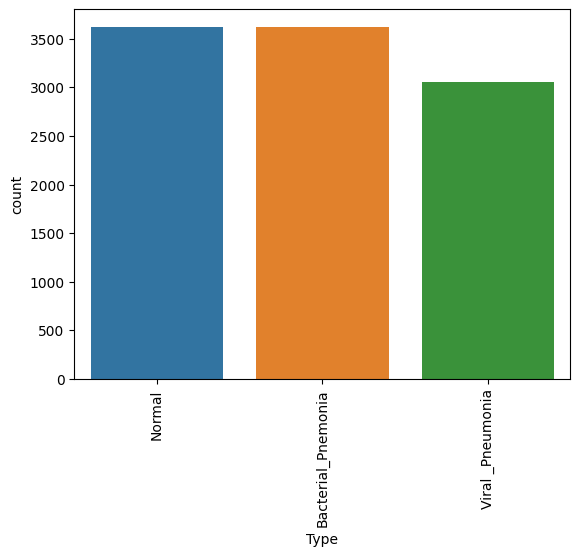

In [8]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [9]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

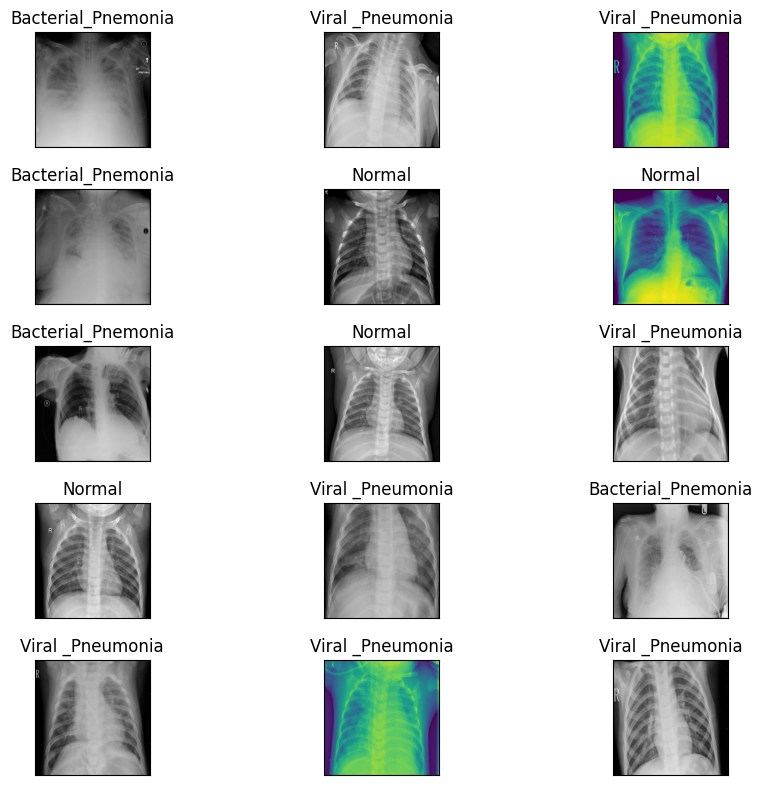

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7718 validated image filenames belonging to 3 classes.
Found 2573 validated image filenames belonging to 3 classes.
Found 2573 validated image filenames belonging to 3 classes.


In [13]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [15]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [18]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=my_callbacks
)

Epoch 1/10


2025-01-18 13:02:55.476675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-01-18 13:02:59.381625: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2025-01-18 13:02:59.492976: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2025-01-18 13:02:59.517401: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22151168 exceeds 10% of free system memory.
2025-01-18 13:02:59.545948: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2025-01-18 13:02:59.572428: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of

242/242 [==============================] - ETA: 0s - loss: 0.2942 - accuracy: 0.8822

2025-01-18 13:07:01.960074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


242/242 [==============================] - 327s 1s/step - loss: 0.2942 - accuracy: 0.8822 - val_loss: 0.1908 - val_accuracy: 0.9285
Epoch 2/10
242/242 [==============================] - 330s 1s/step - loss: 0.1782 - accuracy: 0.9277 - val_loss: 0.1802 - val_accuracy: 0.9289
Epoch 3/10
242/242 [==============================] - 424s 2s/step - loss: 0.1552 - accuracy: 0.9379 - val_loss: 0.1353 - val_accuracy: 0.9510
Epoch 4/10
242/242 [==============================] - 417s 2s/step - loss: 0.1119 - accuracy: 0.9559 - val_loss: 0.1142 - val_accuracy: 0.9561
Epoch 5/10
242/242 [==============================] - 422s 2s/step - loss: 0.0818 - accuracy: 0.9683 - val_loss: 0.1164 - val_accuracy: 0.9541
Epoch 6/10
242/242 [==============================] - 430s 2s/step - loss: 0.0695 - accuracy: 0.9728 - val_loss: 0.1072 - val_accuracy: 0.9572
Epoch 7/10
242/242 [==============================] - 430s 2s/step - loss: 0.0618 - accuracy: 0.9775 - val_loss: 0.1007 - val_accuracy: 0.9604
Epoch 8/10

In [19]:
model.save("model_pnemonia.h5")  

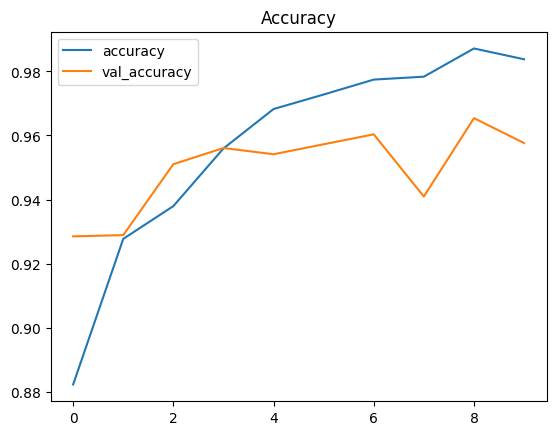

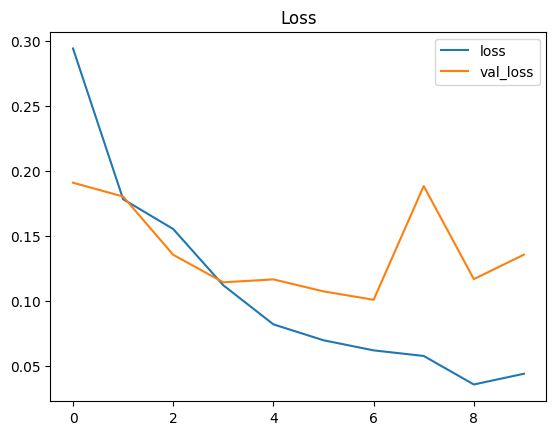

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [21]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

2025-01-18 14:09:44.429817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


    Test Loss: 0.13545
Test Accuracy: 95.76%


In [22]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

2025-01-18 14:11:26.054861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


81/81 [==============================] - 107s 1s/step


In [23]:
train_gen.class_indices

{'Bacterial_Pnemonia': 0, 'Normal': 1, 'Viral _Pneumonia': 2}

In [24]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

Bacterial_Pnemonia       0.97      0.94      0.96       904
            Normal       0.91      0.97      0.94       918
  Viral _Pneumonia       1.00      0.96      0.98       751

          accuracy                           0.96      2573
         macro avg       0.96      0.96      0.96      2573
      weighted avg       0.96      0.96      0.96      2573



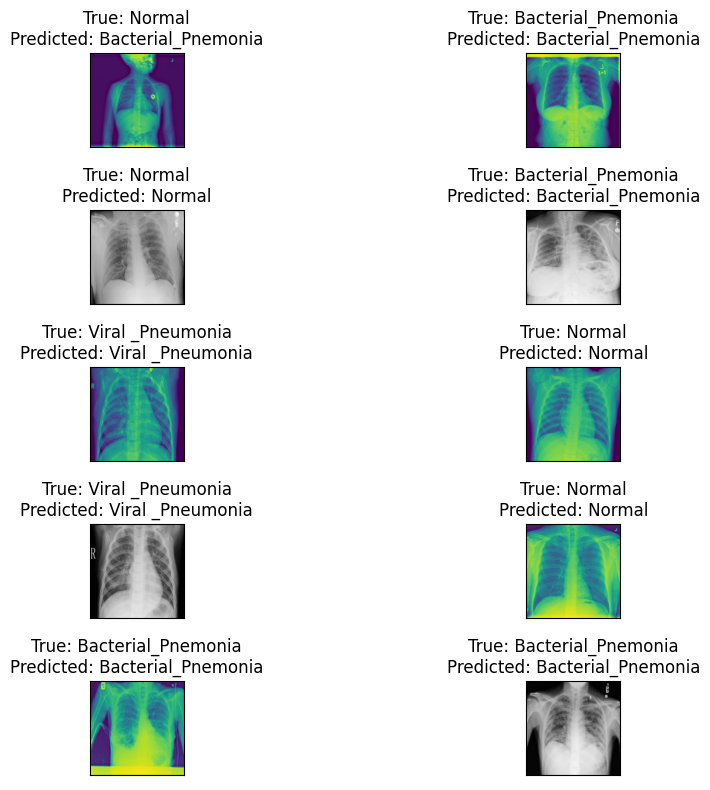

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [26]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'COVID-2.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 1s 1s/step
[[ 0  0 99]]
